Task 1

In [ ]:
import random
from matplotlib import pyplot as plt

In [21]:
def simulate_slotted_aloha(num_slots, n, p, logging = False):
    #efficiency_formula = n * p * (1 - p)**(n - 1)
    nodes = {i: 0 for i in range(0, n)}
    successes_numb = 0
    efficiency = 0
    for i in range(1, num_slots + 1):
        hitcount = 0
        hitters = []
        for node in nodes:
            hit = random.random() <= p
            nodes[node] += hit
            hitcount += hit
            if hit: hitters.append(node)
        successes_numb += 1 if hitcount == 1 else 0
        if logging and i % 10 == 0:
            print(f"Slot {i}: {'Success' if hitcount == 1 else 'idle' if hitcount == 0  else 'collision'}")
            for node in nodes:
                print(f"\t Node {node}: {'tx' if node in hitters else 'idle'}, idle_cnt: {i - nodes[node]}, tx_cnt: {nodes[node]}")
    efficiency = successes_numb / num_slots
    if logging:
        print(f"n={n}, p={p}, efficiency={efficiency}")
    return efficiency

Task 2

In [23]:
simulate_slotted_aloha(100, 5, 0.2, True)

Slot 10: collision
	 Node 0: idle, idle_cnt: 6, tx_cnt: 4
	 Node 1: tx, idle_cnt: 6, tx_cnt: 4
	 Node 2: tx, idle_cnt: 7, tx_cnt: 3
	 Node 3: idle, idle_cnt: 8, tx_cnt: 2
	 Node 4: idle, idle_cnt: 9, tx_cnt: 1
Slot 20: idle
	 Node 0: idle, idle_cnt: 15, tx_cnt: 5
	 Node 1: idle, idle_cnt: 16, tx_cnt: 4
	 Node 2: idle, idle_cnt: 16, tx_cnt: 4
	 Node 3: idle, idle_cnt: 17, tx_cnt: 3
	 Node 4: idle, idle_cnt: 19, tx_cnt: 1
Slot 30: collision
	 Node 0: idle, idle_cnt: 24, tx_cnt: 6
	 Node 1: idle, idle_cnt: 19, tx_cnt: 11
	 Node 2: tx, idle_cnt: 24, tx_cnt: 6
	 Node 3: idle, idle_cnt: 24, tx_cnt: 6
	 Node 4: tx, idle_cnt: 26, tx_cnt: 4
Slot 40: Success
	 Node 0: idle, idle_cnt: 32, tx_cnt: 8
	 Node 1: idle, idle_cnt: 28, tx_cnt: 12
	 Node 2: idle, idle_cnt: 34, tx_cnt: 6
	 Node 3: idle, idle_cnt: 33, tx_cnt: 7
	 Node 4: tx, idle_cnt: 34, tx_cnt: 6
Slot 50: idle
	 Node 0: idle, idle_cnt: 41, tx_cnt: 9
	 Node 1: idle, idle_cnt: 36, tx_cnt: 14
	 Node 2: idle, idle_cnt: 41, tx_cnt: 9
	 Node 3:

0.4

Task 3

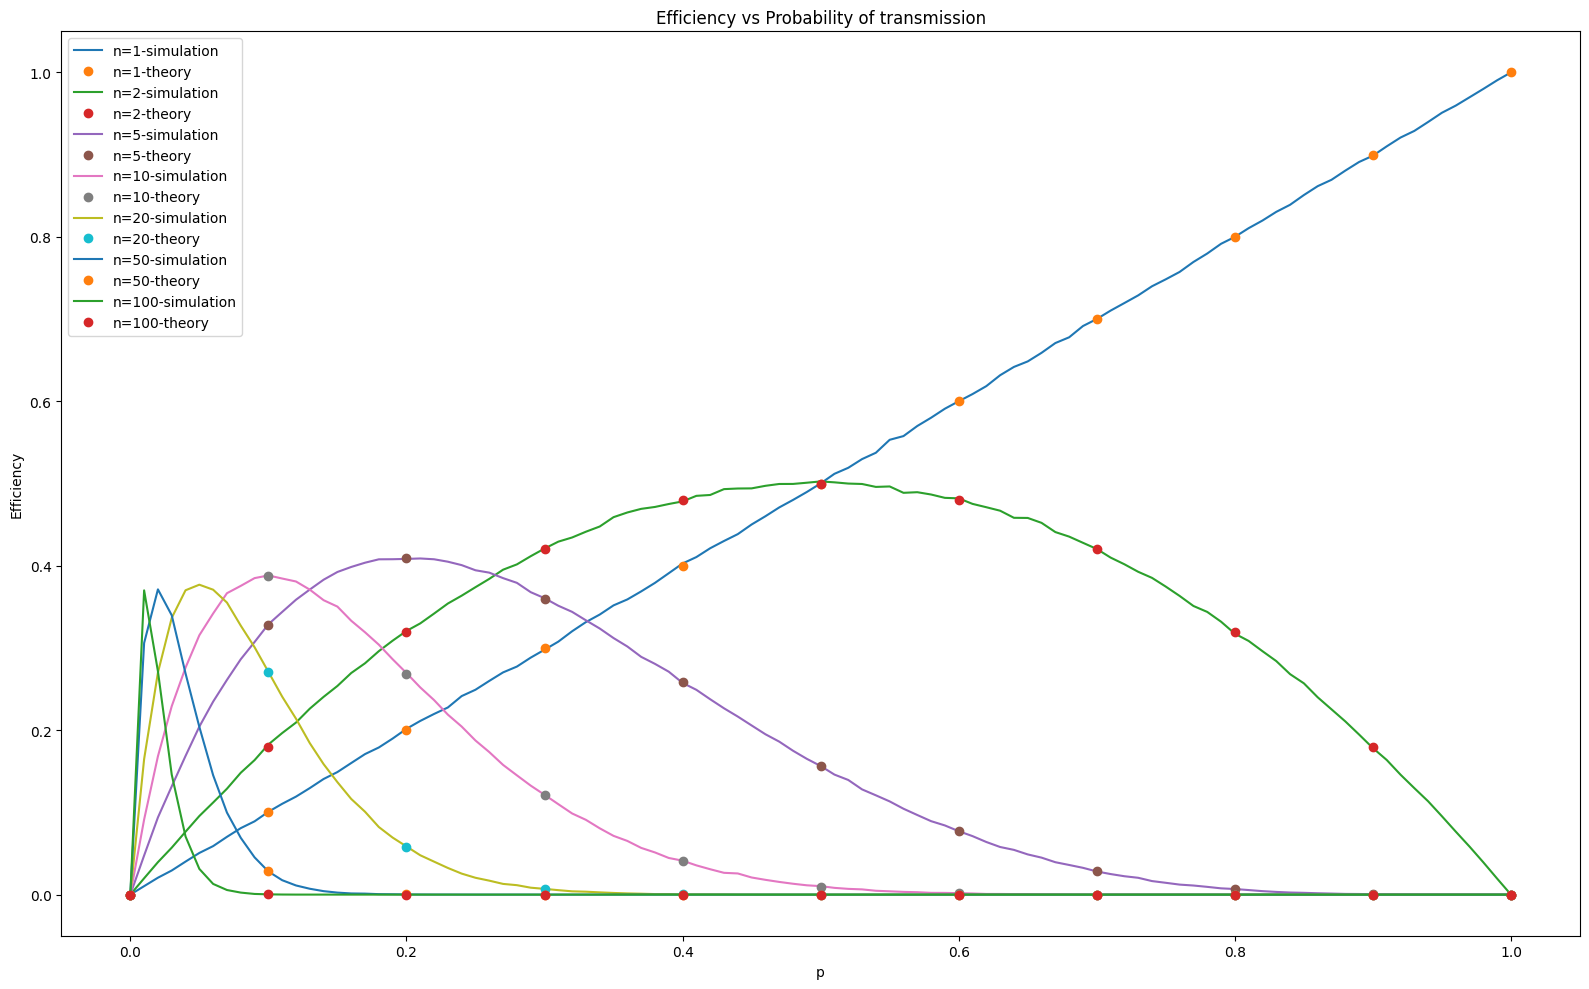

In [20]:
def efficiency_formula(n, p):
    return n * p * (1 - p)**(n - 1)

slots = 100000
ns = [1, 2, 5, 10, 20, 50, 100]
ps = [round(x * 0.01, 2) for x in range(0, 101)]
plt.figure(figsize=(16, 10))
for n in ns:
    ys = []
    yst = []
    for p in ps:
        ys.append(simulate_slotted_aloha(slots, n, p))
        yst.append(efficiency_formula(n, p))
    plt.plot(ps,ys, label = f"n={n}-simulation")
    plt.plot(ps, yst, linestyle = 'None', marker = 'o',  markevery = 10, label = f"n={n}-theory")
plt.xlabel("p")
plt.ylabel("Efficiency")
plt.title("Efficiency vs Probability of transmission")
plt.legend()
plt.tight_layout()
plt.show()

Task 4

1. Because there is only one node. S = n * p * (1 - p)**(n - 1) just becomes S = p, which is linear line.
2. With a constant p when n increases number of collisions also increases, therefore to get optimal efficiency p should decrease. p = 1/n means uniform distribution of nodes, on average only one node will transmit, while others will be idle.
3. Simulation and theoretical values do not agree because there is not enough sample size. With lesser number of slots outliers have a higher impact on efficiency, thus the metrics have higher variance. Also, theoretical formula assumes that the number of trials is infinite. In the above graph sample size is big, while it is not perfectly smooth, it agrees with theoretical values marked with dots.
4. I would make p dynamic for each node. If the node collides too much, p value will decrease, If it's idle for too long, p value will increase. 

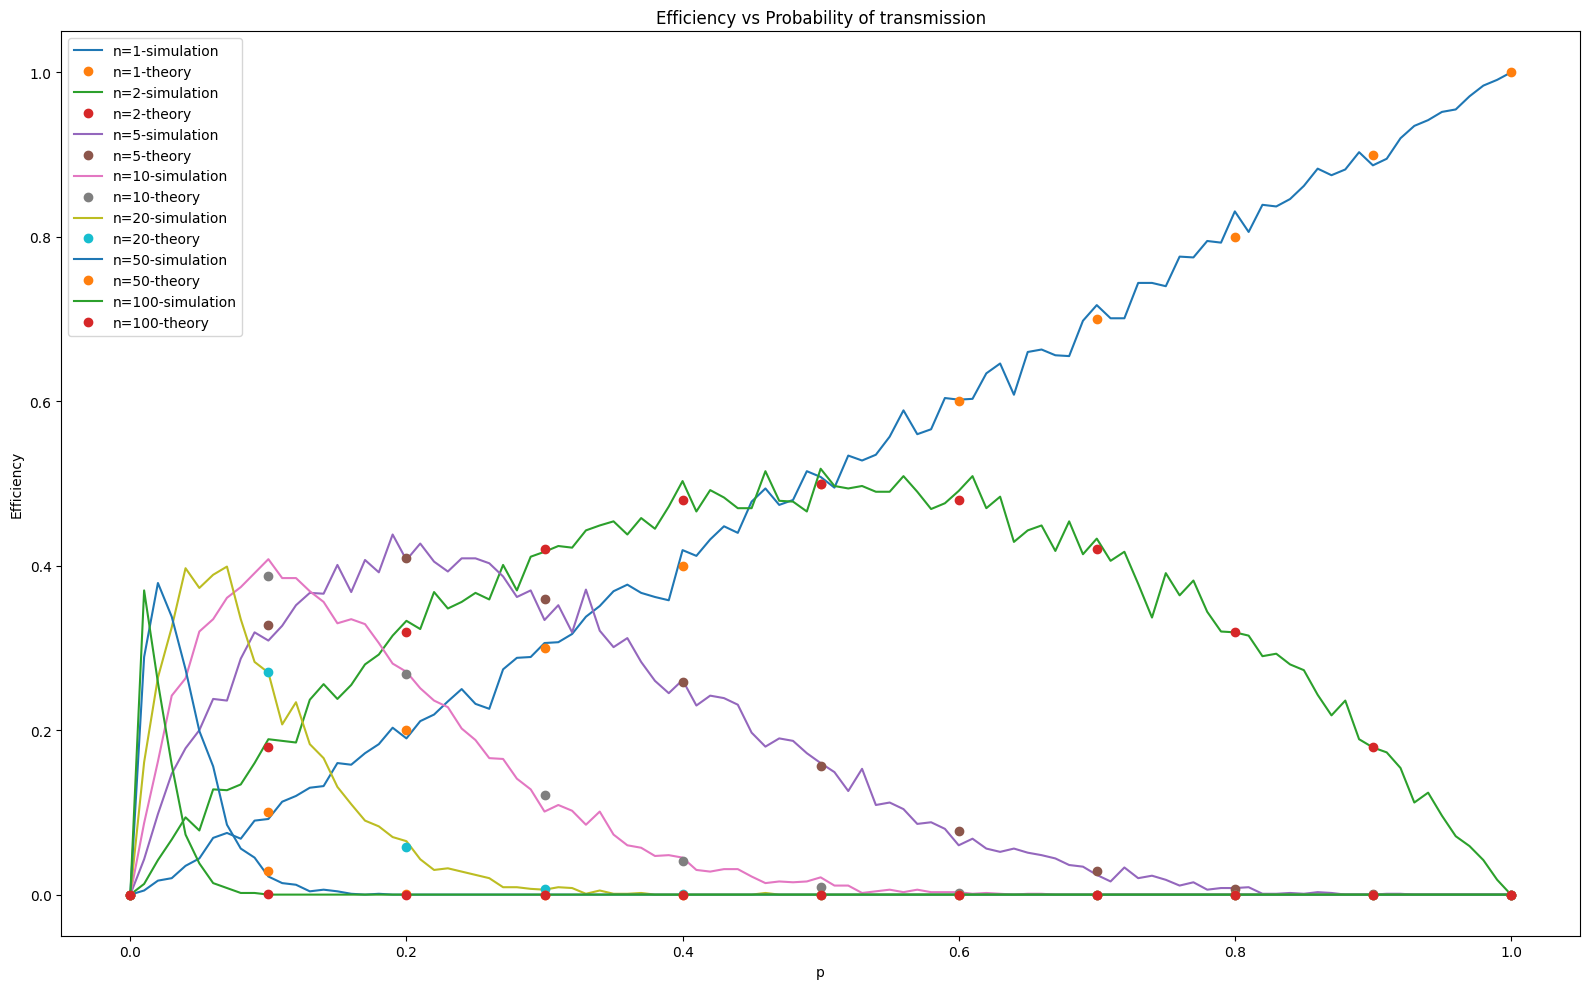

In [24]:
def efficiency_formula(n, p):
    return n * p * (1 - p)**(n - 1)

slots = 1000
ns = [1, 2, 5, 10, 20, 50, 100]
ps = [round(x * 0.01, 2) for x in range(0, 101)]
plt.figure(figsize=(16, 10))
for n in ns:
    ys = []
    yst = []
    for p in ps:
        ys.append(simulate_slotted_aloha(slots, n, p))
        yst.append(efficiency_formula(n, p))
    plt.plot(ps,ys, label = f"n={n}-simulation")
    plt.plot(ps, yst, linestyle = 'None', marker = 'o',  markevery = 10, label = f"n={n}-theory")
plt.xlabel("p")
plt.ylabel("Efficiency")
plt.title("Efficiency vs Probability of transmission")
plt.legend()
plt.tight_layout()
plt.show()